In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
data_file = pd.read_csv('result3.csv')

In [3]:
data_file.describe()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,year,quart,return,last_return
count,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,...,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000
mean,1.934676,1.909732,22.233223,2.926143,14.428193,21.988104,84.557912,51.578900,6.046190,28.381086,...,3.543460,4.363080,1.619221,1.491252,1.409777,0.915031,2013.203820,2.516454,1.035751,1.031672
std,1.786361,1.763966,16.763664,2.784431,12.565569,22.502162,66.569252,46.054232,5.533868,28.657611,...,4.993376,6.211652,1.014030,0.980491,1.035513,0.624531,4.069402,1.129035,0.162546,0.158276
min,-1.100000,-1.070000,-5.990000,-1.700000,-7.440000,-9.460000,-47.830000,-55.992500,-2.710000,-39.430000,...,-2.720000,-2.880000,-0.290000,0.000500,-0.280000,-0.060000,2006.000000,1.000000,0.127124,0.127124
25%,0.640000,0.630000,9.810000,0.860000,4.520000,5.500000,32.710000,9.972500,1.750000,1.260000,...,0.380000,0.440000,0.830000,0.790000,0.640000,0.480000,2010.000000,2.000000,0.952890,0.953180
50%,1.510000,1.480000,17.710000,2.140000,10.500000,12.980000,72.980000,42.955000,3.980000,21.605000,...,1.930000,2.100000,1.390000,1.190000,1.100000,0.750000,2013.000000,3.000000,1.039123,1.033885
75%,2.910000,2.870000,31.540000,4.400000,21.017500,31.747500,123.770000,78.367500,8.440000,50.600000,...,6.010000,7.097500,2.180000,2.030000,1.900000,1.240000,2017.000000,4.000000,1.120891,1.116083
max,5.710000,5.650000,59.200000,8.920000,42.052500,69.282500,225.350000,149.192500,17.360000,108.590000,...,14.170000,17.092500,3.760000,3.710000,3.500000,2.220000,2020.000000,4.000000,3.239215,2.890282


In [4]:
data_test = data_file[data_file['year']>=2017]
data_train = data_file[data_file['year']<2017]

In [5]:
all_input = data_file.drop('return',axis=1).drop('year',axis=1).drop('quart',axis=1)
all_output = data_file['return']
inputall = np.array(all_input)
outputall = np.array(all_output)

In [6]:
train_input = data_train.drop('return',axis=1).drop('year',axis=1).drop('quart',axis=1)
train_output = data_train['return']
inputtrain = np.array(train_input)
outputtrain = np.array(train_output)

In [7]:
test_input = data_test.drop('return',axis=1).drop('year',axis=1).drop('quart',axis=1)
test_output = data_test['return']
inputtest = np.array(test_input)
outputtest = np.array(test_output)

In [8]:
import tensorflow as tf
from tensorflow.keras import layers

In [9]:
lambda_reg = 0.001

In [11]:
model = tf.keras.Sequential([
    layers.Dense(256, activation='tanh', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss='mean_squared_error', 
             metrics=['mae','mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               5888      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [12]:
inputtrain = inputtrain.astype('float64')
history = model.fit(inputtrain, outputtrain, batch_size=32, epochs=500)
inputtest = inputtest.astype('float64')
model.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 1s 60us/sample - loss: 0.3515 - mae: 0.2418 - mse: 0.1413
Epoch 2/500
19725/19725 [==============================] - 1s 35us/sample - loss: 0.2375 - mae: 0.1368 - mse: 0.0323
Epoch 3/500
19725/19725 [==============================] - 1s 36us/sample - loss: 0.2268 - mae: 0.1216 - mse: 0.0264
Epoch 4/500
19725/19725 [==============================] - 1s 34us/sample - loss: 0.2199 - mae: 0.1149 - mse: 0.0242
Epoch 5/500
19725/19725 [==============================] - 1s 34us/sample - loss: 0.2142 - mae: 0.1120 - mse: 0.0232
Epoch 6/500
19725/19725 [==============================] - 1s 33us/sample - loss: 0.2092 - mae: 0.1106 - mse: 0.0228
Epoch 7/500
19725/19725 [==============================] - 1s 33us/sample - loss: 0.2045 - mae: 0.1096 - mse: 0.0225
Epoch 8/500
19725/19725 [==============================] - 1s 34us/sample - loss: 0.2000 - mae: 0.1093 - mse: 0.0224
Epoch 9/500
19725/19725 [================

[0.04290767508931223, 0.14450558, 0.04181502]

In [13]:
model1 = tf.keras.Sequential([
    layers.Dense(256, activation='tanh', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model1.compile(optimizer=tf.keras.optimizers.SGD(0.1),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model1.summary()
inputtrain = inputtrain.astype('float64')
history1 = model1.fit(inputtrain, outputtrain, batch_size=32, epochs=500)
inputtest = inputtest.astype('float64')
model1.evaluate(inputtest, outputtest)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               5888      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 1s 61us/sample - loss: nan - mae: 

[nan, nan, nan]

In [14]:
model2 = tf.keras.Sequential([
    layers.Dense(256, activation='tanh', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model2.compile(optimizer=tf.keras.optimizers.SGD(0.01),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model2.summary()
inputtrain = inputtrain.astype('float64')
history2 = model2.fit(inputtrain, outputtrain, batch_size=32, epochs=500)
inputtest = inputtest.astype('float64')
model2.evaluate(inputtest, outputtest)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               5888      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 1s 52us/sample - loss: 0.3595 - ma

[0.04273611744423406, 0.14413336, 0.041649118]

In [15]:
model3 = tf.keras.Sequential([
    layers.Dense(256, activation='tanh', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model3.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model3.summary()
inputtrain = inputtrain.astype('float64')
history3 = model3.fit(inputtrain, outputtrain, batch_size=32, epochs=500)
inputtest = inputtest.astype('float64')
model3.evaluate(inputtest, outputtest)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               5888      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 1s 54us/sample - loss: 1.0692 - ma

[0.10355755910997684, 0.14428177, 0.04168527]

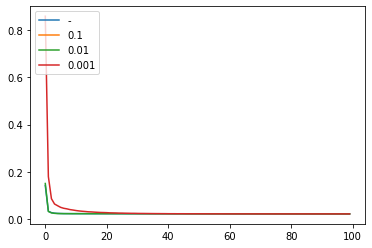

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'][0:100])
plt.plot(history1.history['mse'][0:100])
plt.plot(history2.history['mse'][0:100])
plt.plot(history3.history['mse'][0:100])
plt.legend(['-','0.1','0.01','0.001'], loc='upper left')
plt.savefig("tanh_lr.png")
plt.show()

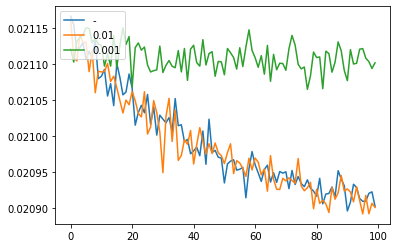

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'][100:200])
plt.plot(history2.history['mse'][100:200])
plt.plot(history3.history['mse'][100:200])
plt.legend(['-','0.1','0.01'], loc='upper left')
plt.savefig("tanh_lr2.png")
plt.show()

In [34]:
lambda_reg = 0.001

In [24]:
model3 = tf.keras.Sequential([
    layers.Dense(256, activation='tanh', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model3.compile(optimizer=tf.keras.optimizers.SGD(0.01),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               5888      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [25]:
inputtrain = inputtrain.astype('float64')
history3 = model3.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model3.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 1s 57us/sample - loss: 2.3036 - mae: 1.1526 - mse: 2.0879
Epoch 2/500
19725/19725 [==============================] - 1s 36us/sample - loss: 2.0268 - mae: 1.0729 - mse: 1.8116
Epoch 3/500
19725/19725 [==============================] - 1s 35us/sample - loss: 1.8388 - mae: 1.0179 - mse: 1.6240
Epoch 4/500
19725/19725 [==============================] - 1s 36us/sample - loss: 1.7567 - mae: 0.9913 - mse: 1.5424
Epoch 5/500
19725/19725 [==============================] - 1s 35us/sample - loss: 1.6299 - mae: 0.9496 - mse: 1.4160
Epoch 6/500
19725/19725 [==============================] - 1s 37us/sample - loss: 1.5336 - mae: 0.9185 - mse: 1.3202
Epoch 7/500
19725/19725 [==============================] - 1s 39us/sample - loss: 1.4530 - mae: 0.8927 - mse: 1.2401
Epoch 8/500
19725/19725 [==============================] - 1s 37us/sample - loss: 1.3883 - mae: 0.8664 - mse: 1.1758
Epoch 9/500
19725/19725 [================

[0.04336348736694708, 0.14455704, 0.04190612]

In [26]:
lambda_reg = 0.01

In [27]:
model4 = tf.keras.Sequential([
    layers.Dense(256, activation='tanh', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model4.compile(optimizer=tf.keras.optimizers.SGD(0.01),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [28]:
inputtrain = inputtrain.astype('float64')
history4 = model4.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model4.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 3s 135us/sample - loss: 3.8152 - mae: 1.0391 - mse: 1.6955
Epoch 2/500
19725/19725 [==============================] - 2s 90us/sample - loss: 3.6014 - mae: 0.9785 - mse: 1.50370s - loss: 3.6132 - mae: 0.9818 - mse: 1.
Epoch 3/500
19725/19725 [==============================] - 2s 89us/sample - loss: 3.4567 - mae: 0.9384 - mse: 1.3815
Epoch 4/500
19725/19725 [==============================] - 2s 92us/sample - loss: 3.3334 - mae: 0.9027 - mse: 1.2811
Epoch 5/500
19725/19725 [==============================] - 2s 95us/sample - loss: 3.2173 - mae: 0.8723 - mse: 1.1881
Epoch 6/500
19725/19725 [==============================] - 2s 96us/sample - loss: 3.1320 - mae: 0.8459 - mse: 1.1262
Epoch 7/500
19725/19725 [==============================] - 2s 99us/sample - loss: 3.0545 - mae: 0.8254 - mse: 1.0725
Epoch 8/500
19725/19725 [==============================] - 2s 89us/sample - loss: 2.9602 - mae: 0.7991 - mse: 1.0021

[0.049949529304128534, 0.14573698, 0.042493567]

In [37]:
lambda_reg = 0.1

In [38]:
model5 = tf.keras.Sequential([
    layers.Dense(256, activation='tanh', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model5.compile(optimizer=tf.keras.optimizers.SGD(0.01),
             loss='mean_squared_error',  
             metrics=['mae','mse'])
model5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
inputtrain = inputtrain.astype('float64')
history5 = model5.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model5.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 2s 79us/sample - loss: 22.9308 - mae: 1.1471 - mse: 2.0637
Epoch 2/500
19725/19725 [==============================] - 1s 51us/sample - loss: 21.5697 - mae: 1.0385 - mse: 1.6982
Epoch 3/500
19725/19725 [==============================] - 1s 54us/sample - loss: 20.4503 - mae: 1.0001 - mse: 1.5749s - loss: 20.7575 - m
Epoch 4/500
19725/19725 [==============================] - 1s 52us/sample - loss: 19.3500 - mae: 0.9579 - mse: 1.4456
Epoch 5/500
19725/19725 [==============================] - 1s 51us/sample - loss: 18.2463 - mae: 0.9039 - mse: 1.2854s - loss: 18.3527 - mae: 0.9087 - mse
Epoch 6/500
19725/19725 [==============================] - 1s 53us/sample - loss: 17.2435 - mae: 0.8738 - mse: 1.1992
Epoch 7/500
19725/19725 [==============================] - 1s 50us/sample - loss: 16.2791 - mae: 0.8456 - mse: 1.1223
Epoch 8/500
19725/19725 [==============================] - 1s 51us/sample - loss: 15.3228 - m

In [54]:
lambda_reg = 0.1
model6 = tf.keras.Sequential([
    layers.Dense(64, activation='tanh', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model6.compile(optimizer=tf.keras.optimizers.SGD(0.01),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model6.summary()
inputtrain = inputtrain.astype('float64')
history6 = model6.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model6.evaluate(inputtest, outputtest)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                1472      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 2s 94us/sample - loss: 4.0608 - ma

[0.05098798602722356, 0.14393179, 0.04167214]

In [55]:
lambda_reg = 0.1
model7 = tf.keras.Sequential([
    layers.Dense(128, activation='tanh', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model7.compile(optimizer=tf.keras.optimizers.SGD(0.01),
             loss='mean_squared_error', 
             metrics=['mae','mse'])
model7.summary()
inputtrain = inputtrain.astype('float64')
history7 = model7.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model7.evaluate(inputtest, outputtest)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               2944      
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 2s 102us/sample - loss: 3.3460 -

[0.050816945595406046, 0.14470758, 0.042025335]

In [56]:
lambda_reg = 0.1
model8 = tf.keras.Sequential([
    layers.Dense(256, activation='tanh', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model8.compile(optimizer=tf.keras.optimizers.SGD(0.01),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model8.summary()
inputtrain = inputtrain.astype('float64')
history8 = model8.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model8.evaluate(inputtest, outputtest)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 2s 108us/sample - loss: 3.8938 -

[0.050253447165449903, 0.14444472, 0.041939452]

In [10]:
lambda_reg = 0.1
modelfinal = tf.keras.Sequential([
    layers.Dense(64, activation='tanh', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

modelfinal.compile(optimizer=tf.keras.optimizers.SGD(0.01),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
modelfinal.summary()
inputtrain = inputtrain.astype('float64')
historyfinal = modelfinal.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
modelfinal.evaluate(inputtest, outputtest)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1472      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 1s 55us/sample - loss: 4.4432 - mae: 

[0.5021524383972652, 0.14557303, 0.04219325]

In [13]:
data_pre = pd.read_csv('pred_data.csv')
data_pre = data_pre.drop(['Unnamed: 0'],axis=1)
data_pre['last_return']=0
data_pre.fillna(0,inplace=True)
pred_data = np.array(data_pre.drop(['stock','year','quart'],axis=1))

In [14]:
y = modelfinal.predict(pred_data)
df = pd.DataFrame(y)
df.to_csv('tanh_result.csv')

In [11]:
data_pre = pd.read_csv('pred201912_withreturn.csv')
data_pre = data_pre.drop(['stock'],axis=1)
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('tanh_result2.csv')

In [13]:
data_pre = pd.read_csv('pred201909_withreturn.csv')
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('tanh_result3.csv')

In [14]:
data_pre = pd.read_csv('pred201906_withreturn.csv')
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('tanh_result4.csv')

In [16]:
data_pre = pd.read_csv('pred201903_withreturn.csv')
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('tanh_result5.csv')